<a href="https://colab.research.google.com/github/sunshineluyao/NYU_Integrated_Marketing/blob/main/HypothesisTesting_ANOVA/HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

**Install the Package Pandas and Numpy for the function of "TABLE" and "Math"**

In [1]:
import pandas as pd
import numpy as np

**Read the marketing data from Github Url ("Read Raw")**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/bank-full.csv',sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**View the data information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Install the pingouin Package**

In [4]:
pip install pingouin

     |████████████████████████████████| 225kB 8.4MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=94d738eed40ed7f82cae8366b8293e4bec287b483733edabdc883174277165b6
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=d9ad58b7769fe903c4e63771fcf5be83b56679ab8dab7108ed81ae0647cfc790
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=d2a7674d84aa919e8dda032589bfa591f3e119a6878275a651515aff5f5b0e33
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


**Import the pingouin package**

In [5]:
import pingouin as pg

# Hypothesis Test

**One-Sample T-test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [6]:
x=df['age']
pg.ttest(x, 30)

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,218.985328,45210,two-sided,0.0,"[40.84, 41.03]",1.029895,inf,1.0


In [7]:
df['age'].mean()

40.93621021432837

**Two-Sample T-Test**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [8]:
balance_housing = df[df['housing']=='yes']['balance']
balance_no_housing = df[df['housing']=='no']['balance']

In [9]:
balance_housing.mean()

1175.1030640668523

In [10]:
balance_no_housing.mean()

1596.5012698570788

In [11]:
x=balance_housing
y=balance_no_housing
pg.ttest(x, y, paired=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-14.081118,34203.875315,two-sided,6.625426e-45,"[-480.06, -362.74]",0.138728,9.456e+40,1.0


**One-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [12]:
aov = pg.anova(dv='balance', between='education', data=df)
aov.round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,education,3,45207,116.682,0.0,0.008


In [13]:
df.groupby('education')['balance'].mean()

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64

**Two-Way ANOVA**

https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

In [14]:

aov = pg.anova(dv='balance', between=['education','job'], data=df)
aov.round(3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Source,SS,DF,MS,F,p-unc,np2
0,education,8.458529e+08,3.0,2.819510e+08,30.802,0.000,0.002
1,job,1.966850e+09,11.0,1.788045e+08,19.534,0.000,0.005
2,education * job,5.327554e+08,33.0,1.614410e+07,1.764,0.004,0.001
3,Residual,4.134038e+11,45163.0,9.153594e+06,NaN,NaN,NaN


In [15]:
df.groupby(['education','job'])['balance'].sum()

education  job          
primary    admin.             194470
           blue-collar       4081580
           entrepreneur       307324
           housemaid          707420
           management         491640
           retired           1494239
           self-employed      172994
           services           333467
           student             54715
           technician         234981
           unemployed         408165
           unknown             89263
secondary  admin.            4708657
           blue-collar       5714177
           entrepreneur       580396
           housemaid          570218
           management        1487048
           retired           2028145
           self-employed      742616
           services          3311338
           student            640031
           technician        5881175
           unemployed        1043027
           unknown             88716
tertiary   admin.             696569
           blue-collar        230838
           en

**Chi-Squared of Independence**

https://pingouin-stats.org/generated/pingouin.chi2_independence.html#pingouin.chi2_independence


In [16]:
expected, observed, stats = pg.chi2_independence(df, x='loan',
                                                 y='y')

In [17]:
expected

y,no,yes
loan,,
no,33525.437924,4441.562076
yes,6396.562076,847.437924


In [18]:
observed

y,no,yes
loan,,
no,33162.5,4804.5
yes,6759.5,484.5


In [19]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,209.616980,1.0,1.665061e-47,0.068091,1.0
1,cressie-read,0.666667,217.964803,1.0,2.513745e-49,0.069434,1.0
2,log-likelihood,0.000000,237.146048,1.0,1.648199e-53,0.072425,1.0
3,freeman-tukey,-0.500000,254.090511,1.0,3.331960e-57,0.074967,1.0
4,mod-log-likelihood,-1.000000,273.667325,1.0,1.801570e-61,0.077802,1.0
5,neyman,-2.000000,322.752120,1.0,3.642820e-72,0.084491,1.0


**Mann-Whitney U Test (= Wilcoxon rank-sum test)**

https://pingouin-stats.org/generated/pingouin.mwu.html#pingouin.mwu

In [20]:
balance_loan = df[df['loan']=='yes']['balance']
balance_no_loan = df[df['loan']=='no']['balance']

In [21]:
df.groupby('loan')['balance'].median()

loan
no     496
yes    258
Name: balance, dtype: int64

In [22]:
x=balance_loan
y=balance_no_loan
pg.mwu(x, y, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,109609078.0,two-sided,1.515910e-165,0.202939,0.398531


#Paired Tests



**Import the data**

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/HypothesisTesting_ANOVA/Q_GDP_Capita.csv')
df.head()

,LOCATION,Country,Measure,Frequency,TIME,Unit Code,Value
0,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2017-Q4,USD,50719.7
1,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q1,USD,51371.0
2,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q2,USD,52211.9
3,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q3,USD,52561.7
4,AUS,Australia,"Per Head, US $, current prices, current PPPs, ...",Quarterly,2018-Q4,USD,53023.0


**Conduct the paired-t test to compare the GDP per capita for the first quarter of 2019 and 2020 for all countries**

https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [24]:
df_2019_Q2 = df[df.TIME=='2019-Q2'][['Country','Value','TIME']]
df_2019_Q2=df_2019_Q2.groupby(['Country','TIME']).max().reset_index()
df_2019_Q2=df_2019_Q2[['Country','Value']].sort_values(by='Country', ascending=True)
df_2019_Q2.head()

,Country,Value
0,Australia,54425.3
1,Austria,58827.2
2,Belgium,54675.1
3,Bulgaria,24488.9
4,Canada,51537.9


In [25]:
df_2020_Q2 = df[df.TIME=='2020-Q2'][['Country','Value','TIME']]
df_2020_Q2=df_2020_Q2.groupby(['Country','TIME']).max().reset_index()
df_2020_Q2=df_2020_Q2[['Country','Value']].sort_values(by='Country', ascending=True)
df_2020_Q2.head()

,Country,Value
0,Australia,50912.7
1,Austria,50477.1
2,Belgium,47330.7
3,Bulgaria,22933.4
4,Canada,44462.8


In [26]:
pre=df_2019_Q2['Value']
post=df_2020_Q2['Value']
from pingouin import ttest
ttest(pre, post, paired=True).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,12.69,38,two-sided,0.0,"[4161.4, 5740.57]",0.27,2.147e+12,0.38


In [27]:
df_Figure = df[df.TIME.isin(['2019-Q2','2020-Q2'])][['Country','Value','TIME']].groupby(['Country','TIME']).max().reset_index()
import plotly.express as px
fig = px.bar(df_Figure, x="Country", y="Value",
             color='TIME', barmode='group',
             height=400)
fig.show()

Conduct the Wilcoxon Signed-rank test to compare probability of GDP per capita for the first quarter of 2019 is larger than 2020 or not for all countries



In [28]:
### install the package
import pingouin as pg
pg.wilcoxon(pre, post, tail='two-sided')

,W-val,tail,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,5.465166e-08,1.0,0.604208


# Assumption: Pearson or Spearman Test of Correlations

**Histogram and scatterplot**

In [35]:
#install package
import seaborn as sns

In [38]:
df_joint= df_2019_Q2.merge(df_2020_Q2, how='inner',on="Country")
df_joint.columns =['Country','2019_Q2','2020_Q2']
df_joint.head()

,Country,2019_Q2,2020_Q2
0,Australia,54425.3,50912.7
1,Austria,58827.2,50477.1
2,Belgium,54675.1,47330.7
3,Bulgaria,24488.9,22933.4
4,Canada,51537.9,44462.8


**draw scatter and histgram plot**

https://seaborn.pydata.org/generated/seaborn.jointplot.html

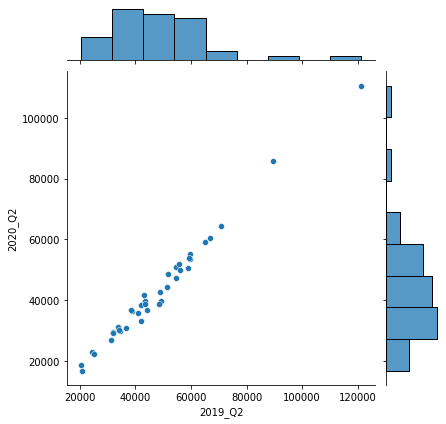

In [39]:
#draw the plot
sns.jointplot(data=df_joint, x="2019_Q2", y="2020_Q2")

**Test for multivariate normality**

https://pingouin-stats.org/generated/pingouin.multivariate_normality.html

In [40]:
X = df_joint[['2019_Q2', '2020_Q2']]
pg.multivariate_normality(X, alpha=.05)

HZResults(hz=0.7158322195020562, pval=0.11142774379515946, normal=True)

**We can't reject multivariate normality, so we will use pearson test for correlations**

https://pingouin-stats.org/generated/pingouin.corr.html#pingouin.corr

In [41]:
x=df_joint['2019_Q2']
y=df_joint['2020_Q2']
pg.corr(x, y, method="pearson").round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,39,0.993,"[0.99, 1.0]",0.987,0.986,0.0,1.327e+32,1.0


#Power Analysis

**Power analysis for T-test**

https://pingouin-stats.org/generated/pingouin.power_ttest.html#pingouin.power_ttest


Note: For a paired T-test, the sample size n corresponds to the number of pairs. For an independent two-sample T-test with equal sample sizes, n corresponds to the sample size of each group (i.e. number of observations in one group).

In [29]:
#install the package
from pingouin import power_ttest

d is the Cohen d effect size, Power is 1-Type II error, Alpha is the type I error

In [30]:
### conduct the test
print('n: %.4f' % power_ttest(d=0.1, power=0.80, alpha=0.05))

n: 1570.7331


**Power analysis for ANOVA**

https://pingouin-stats.org/generated/pingouin.power_anova.html#pingouin.power_anova

In [31]:
# install the package
from pingouin import power_anova

eta is the effect size for ANOVA (the level of correlation across catergories), k is the number of categories, Power is 1-Type II error, alpha is type I error

In [32]:
### conduct the test
print('n: %.4f' % power_anova(eta=0.1, k=3, power=0.80, alpha=0.05))

n: 29.9255


**Power analysis for Chi-square Test**

https://pingouin-stats.org/generated/pingouin.power_chi2.html#pingouin.power_chi2

In [33]:
# install the package
from pingouin import power_chi2

dof is the degress of freedom $=(r-1)*(c-1)$, where r is the number of rows in the expected frequency table and c is the nuber of columns in the expected frequency table. W is the effect size, which is the level of correlation. Power is 1-Type II error and Alpha is the type I error. 

In [34]:
### conduct the test
print('n: %.4f' % power_chi2(dof=1, w=0.3, power=0.80, alpha=0.05))

n: 87.2096
